Year found: 1990


,Rank,Male Name,Female Name
0,1,Michael,Jessica
1,2,Christopher,Ashley
2,3,Matthew,Brittany
3,4,Joshua,Amanda
4,5,Daniel,Samantha
5,6,David,Sarah
6,7,Andrew,Stephanie
7,8,James,Jennifer
8,9,Justin,Elizabeth
9,10,Joseph,Lauren


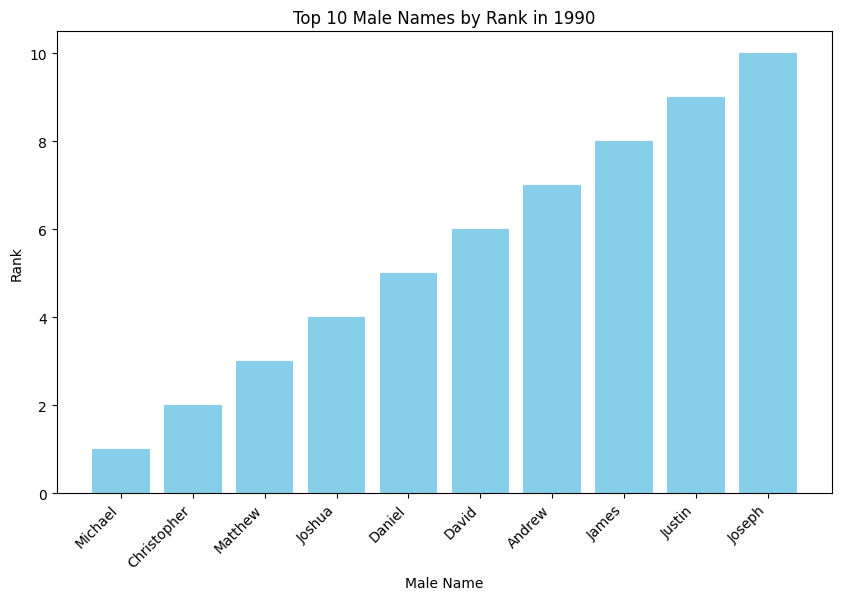

,Name,Rank
0,Michael,1
1,Jessica,1
2,Christopher,2
3,Ashley,2
4,Matthew,3
5,Brittany,3
6,Joshua,4
7,Amanda,4


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def extract_year(filename):
    with open(filename, 'r') as file:
        text = file.read()

    year_match = re.search(r'Popularity\s+in\s+(\d{4})', text)
    if year_match:
        year = year_match.group(1)
        print("Year found:", year)
        return year
    else:
        print("Year not found")
        return None

extract_year('baby1990.html')

def extract_names_and_ranks(filename):
    with open(filename, 'r') as file:
        text = file.read()

    tuples = re.findall(r'<tr align="right"><td>(\d+)</td><td>(\w+)</td><td>(\w+)</td>', text)
    data = pd.DataFrame(tuples, columns=['Rank', 'Male Name', 'Female Name'])

    data['Rank'] = pd.to_numeric(data['Rank'])
    return data[:10]


top_names_df = extract_names_and_ranks('baby1990.html')
display(top_names_df)

# Plotting the top 10 male names and their ranks
plt.figure(figsize=(10, 6))
plt.bar(top_names_df['Male Name'], top_names_df['Rank'], color='skyblue')
plt.xlabel('Male Name')
plt.ylabel('Rank')
plt.title('Top 10 Male Names by Rank in 1990')
plt.xticks(rotation=45, ha='right')
plt.show()

def extract_names_to_dict(filename):
    with open(filename, 'r') as file:
        text = file.read()


    tuples = re.findall(r'<tr align="right"><td>(\d+)</td><td>(\w+)</td><td>(\w+)</td>', text)

    names_rank = {}
    for rank, male_name, female_name in tuples[:4]:
        rank = int(rank)

        if male_name not in names_rank or rank < names_rank[male_name]:
            names_rank[male_name] = rank

        if female_name not in names_rank or rank < names_rank[female_name]:
            names_rank[female_name] = rank
    dict_df = pd.DataFrame(list(names_rank.items()), columns=['Name', 'Rank'])
    display(dict_df)


extract_names_to_dict('baby1990.html')